<h1>20 Aug 2025

<h2><center> Importing libraries , Loading dataset, and validating

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
folder = r'C:\Users\asus\OneDrive\Desktop\Python\DataSets'

In [3]:
df=pd.read_csv('C:/Users/asus/OneDrive/Desktop/Python/DataSets/titanic.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.shape

(891, 12)

<h1> 27 Aug 2025

<h2><center>Exploratory Data Analysis

In [9]:
round(((df.isnull().sum())/df.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [10]:
df.columns[round(((df.isnull().sum())/df.shape[0])*100,2)>20]

Index(['Cabin'], dtype='object')

In [11]:
#df.drop(columns=['Cabin'])  #temp delete
df.drop(columns=['Cabin'],inplace=True) #permanent delete

In [12]:
set(df.select_dtypes(include=['int','float']).columns)

{'Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'SibSp', 'Survived'}

In [13]:
set(df.columns[(df.isnull().sum())>0])

{'Age', 'Embarked'}

In [14]:
set(df.select_dtypes(include=['int','float']).columns) & set(df.columns[(df.isnull().sum())>0])

{'Age'}

In [15]:
df['Age'].median()

28.0

In [16]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [17]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
set(df.select_dtypes(include=['object']).columns) & set(df.columns[(df.isnull().sum())>0])

{'Embarked'}

In [19]:
df['Embarked'].value_counts().index[0]

'S'

In [20]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].value_counts().index[0])

In [21]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\asus\AppData\Local\Temp\ipykernel_8296\4273697036.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')


In [24]:
df['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

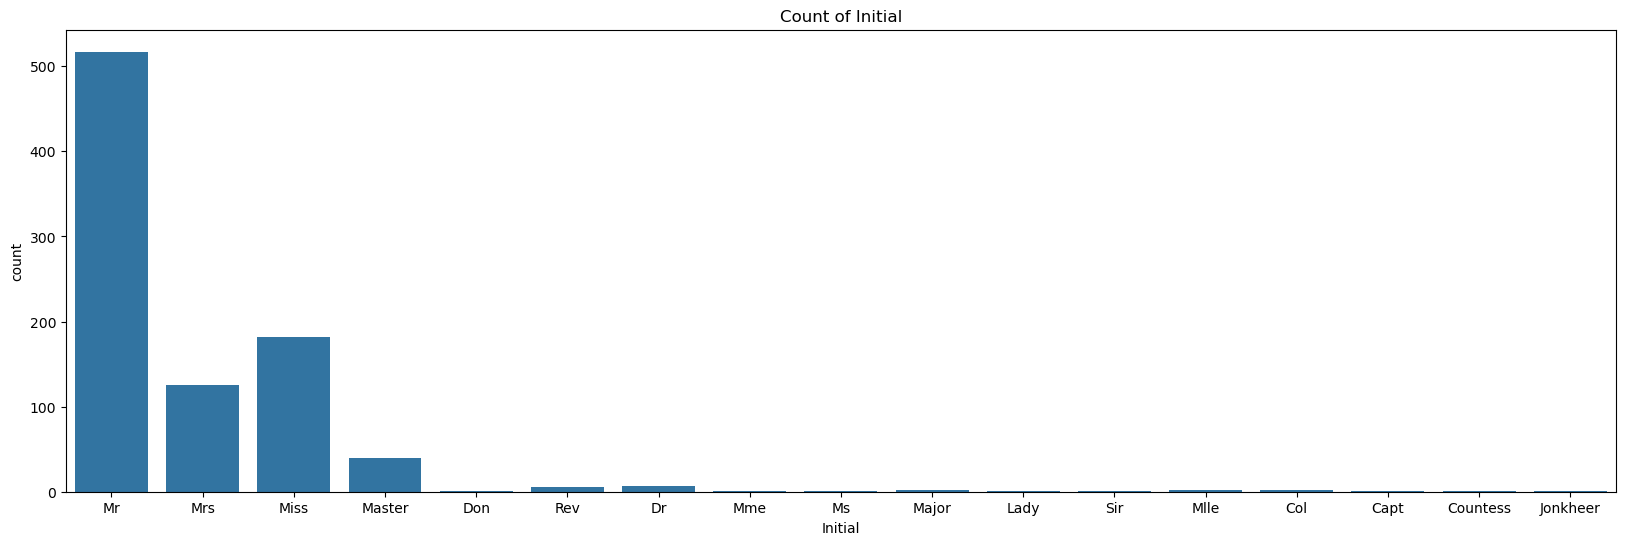

In [25]:
plt.figure(figsize=(20,6))  
sns.countplot(x=df['Initial'])
plt.title("Count of Initial")
plt.show()

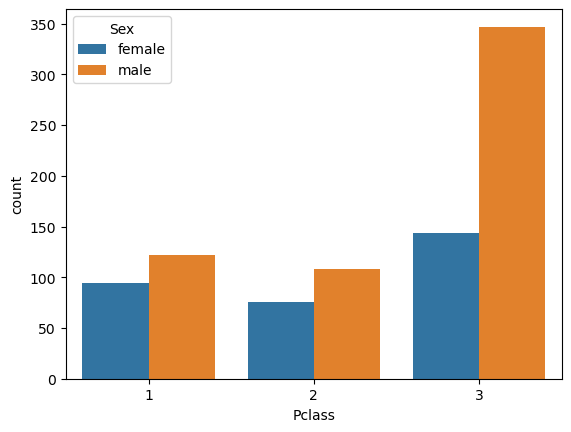

In [26]:
sns.countplot(x='Pclass',hue='Sex',data=df)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

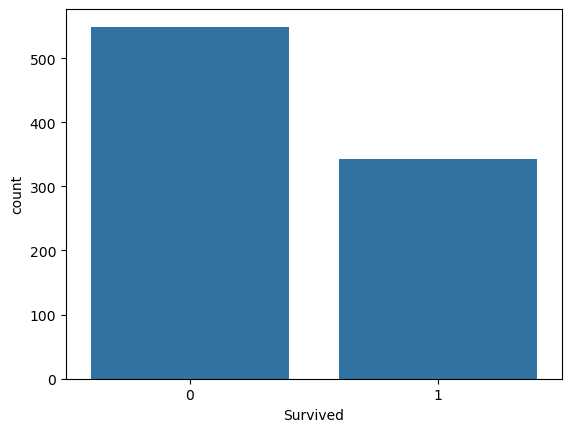

In [27]:
sns.countplot(x='Survived', data=df)

<Axes: >

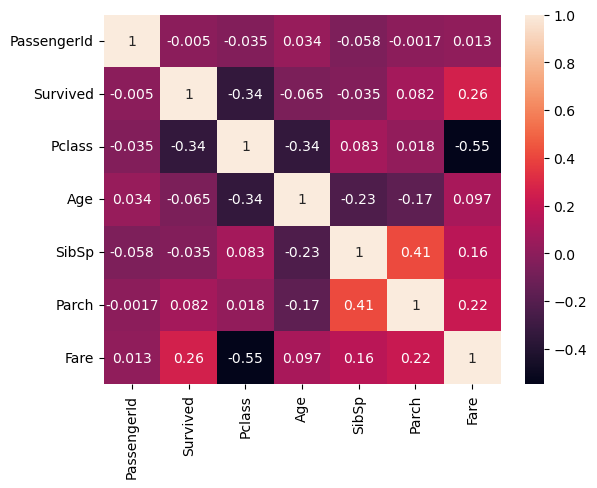

In [28]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

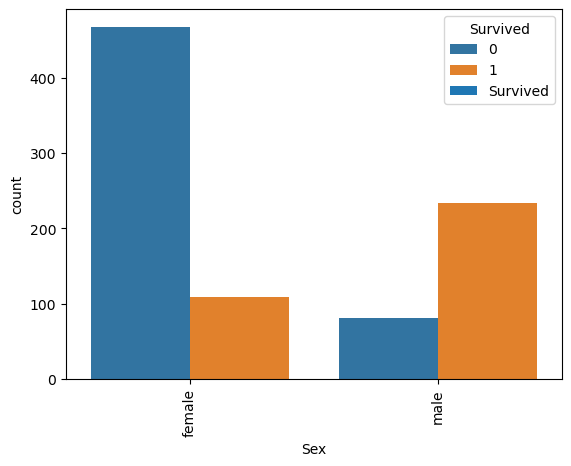

In [29]:
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot(x='Sex',hue='Survived',data=df)
plt.show()

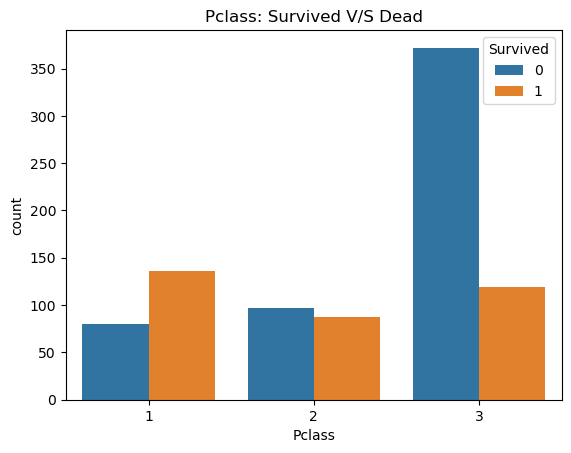

In [30]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title('Pclass: Survived V/S Dead')
plt.show()

In [31]:
pd.crosstab(index=[df.Sex,df.Survived],columns=df.Pclass,margins=True,margins_name='Total').astype(int).style.background_gradient(cmap='summer_r')

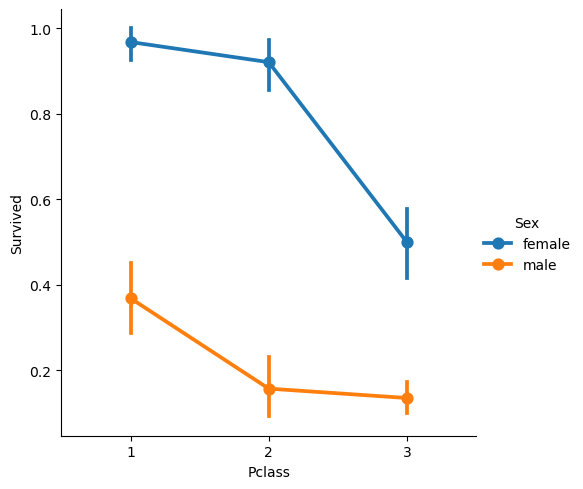

In [32]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='point')
plt.show()

In [33]:
df['Age'].max()

80.0

In [34]:
print("older person survived was of",df['Age'].max())
print("youngest person survived was of",df['Age'].min())
print("avg person survived was of",df['Age'].mean())

older person survived was of 80.0
youngest person survived was of 0.42
avg person survived was of 29.36158249158249


In [35]:
print(df['Initial'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [36]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [37]:
df['Initial'].replace(['Mr', 'Mrs' ,'Miss' ,'Master' ,'Don' ,'Rev' ,'Dr' ,'Mme' ,'Ms' ,'Major' ,'Lady', 'Sir' ,'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr','Mr','Mr','Mr'],inplace=True)

In [38]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Miss,Mr,Mrs,Other
Sex,,,,
female,307,4,1,2
male,517,46,12,2


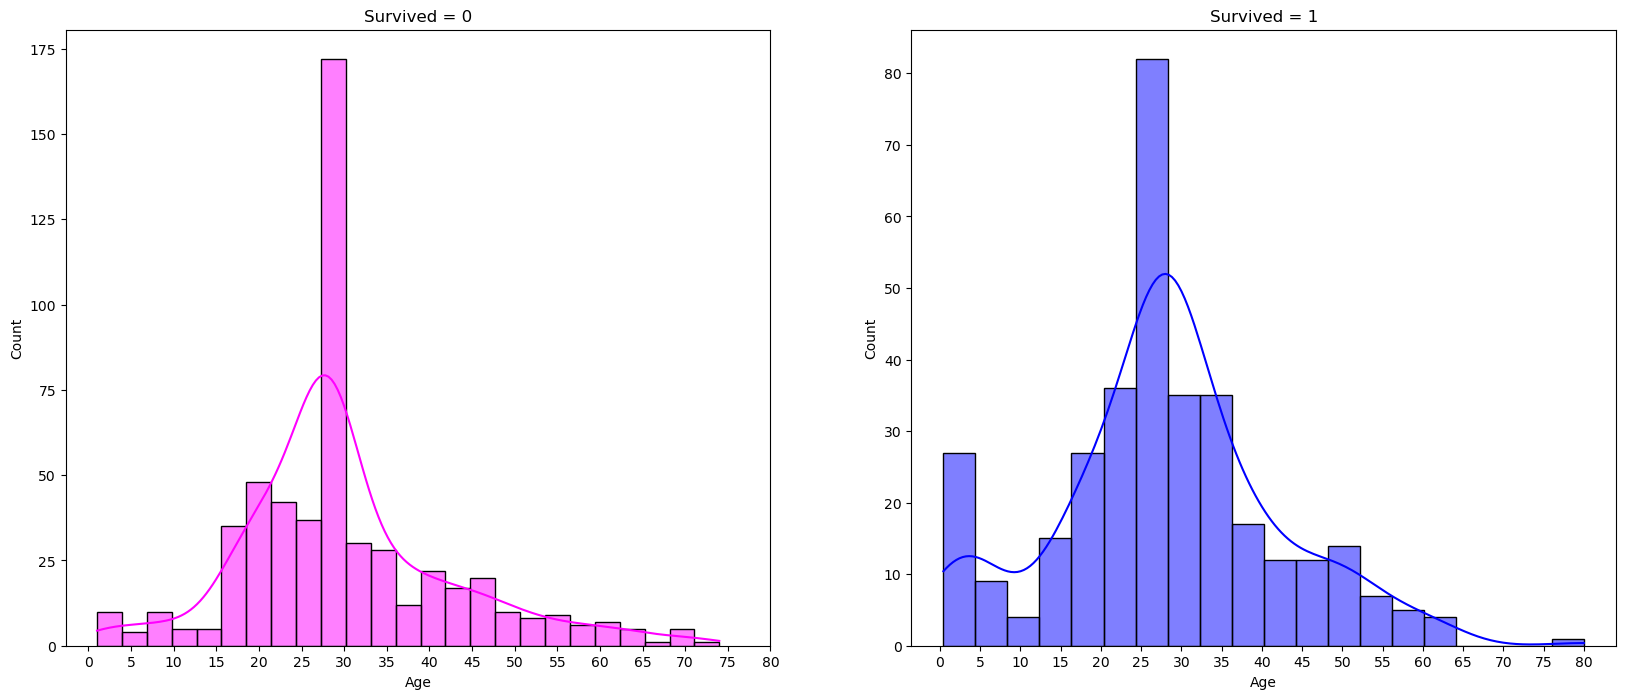

In [39]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.histplot(df[df['Survived']==0].Age,kde=True,ax=ax[0],color='magenta')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
sns.histplot(df[df['Survived']==1].Age,kde=True,ax=ax[1],color='blue')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

<h5>Data Encoding = convert object (categorical) column to numeric

In [40]:
df.drop(columns=['PassengerId','Name'],inplace=True)

In [41]:
df.select_dtypes(include=['int','float']).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<h5>Treating Outliers

In [42]:
def outlier(df,i):
    q1=np.percentile(df[i],25)
    q3=np.percentile(df[i],75)
    iqr=q3-q1
    lower_fence=q1-(iqr*1.5)
    upper_fence=q3+(iqr*1.5)
    df[i]=np.where(((df[i]<lower_fence)|(df[i]>upper_fence)),df[i].median(),df[i])
for j in ['Survived','Pclass','Age','SibSp','Parch','Fare']:
    outlier(df,j)

<h5>difference in std because outlier is removed


In [43]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.0,891.000000
mean,0.383838,2.308642,28.476992,0.297419,0.0,17.383622
std,0.486592,0.836071,9.793559,0.521648,0.0,12.713016
min,0.000000,1.000000,3.000000,0.000000,0.0,0.000000
25%,0.000000,2.000000,23.750000,0.000000,0.0,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.0,14.454200
75%,1.000000,3.000000,33.000000,1.000000,0.0,24.150000
max,1.000000,3.000000,54.000000,2.000000,0.0,65.000000


In [44]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [45]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [46]:
x.drop(columns=['Initial'],inplace=True)

In [47]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3.0,male,22.0,1.0,0.0,A/5 21171,7.2500,S
1,1.0,female,38.0,1.0,0.0,PC 17599,14.4542,C
2,3.0,female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
3,1.0,female,35.0,1.0,0.0,113803,53.1000,S
4,3.0,male,35.0,0.0,0.0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
886,2.0,male,27.0,0.0,0.0,211536,13.0000,S
887,1.0,female,19.0,0.0,0.0,112053,30.0000,S
888,3.0,female,28.0,1.0,0.0,W./C. 6607,23.4500,S
889,1.0,male,26.0,0.0,0.0,111369,30.0000,C


In [48]:
x.select_dtypes(exclude=['int','float']).columns

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

In [49]:
def main(x,i):
    x[i]=x[i].map(x[i].value_counts().to_dict())
for j in ['Sex','Ticket','Embarked']:
    main(x,j)

In [50]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3.0,577,22.0,1.0,0.0,1,7.2500,646
1,1.0,314,38.0,1.0,0.0,1,14.4542,168
2,3.0,314,26.0,0.0,0.0,1,7.9250,646
3,1.0,314,35.0,1.0,0.0,2,53.1000,646
4,3.0,577,35.0,0.0,0.0,1,8.0500,646


In [51]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'], dtype='object')

<h1> 3 Sept 2025

<h2><center> Feature Enginneering

<h3>Feature Scaling 

it is a data preprocessing technique used to bring all numerical feature into samee scale range
benefit

1. Fair contributions of features
2. Faster conversions
3. Improves Accuracy

<h5> Methods of Feature Scaling

1. Standardization (Z-score Normalization)

Standardisation is the process of transforming your data so that it has:

Mean = 0

Standard deviation = 1

Basically, you rescale your data into z-scores.

Formula:

 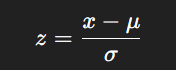

μ = mean, 
σ = standard deviation.

Output range: No fixed range (can be negative/positive). Values have mean = 0 and standard deviation = 1.

When to use:

Works well with algorithms that assume Gaussian distribution (e.g., Linear Regression, Logistic Regression, PCA).

Good for distance-based models too (KNN, SVM), because features are on comparable scales.

2. Normalization (Min-Max Scaling)

Formula:

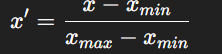

Output range: [0, 1] (or sometimes [-1, 1]).

When to use:

Useful when you need all features strictly within a bounded interval.

Common in Neural Networks, where input between 0–1 helps faster convergence.

Works better when data does not follow Gaussian distribution but has varying ranges.

In [52]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x=s.fit_transform(x)
x=pd.DataFrame(x)
x.columns=['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.827377,0.737695,-0.661724,1.347605,0.0,-0.579162,-0.797554,0.612906
1,-1.566107,-1.355574,0.972921,1.347605,0.0,-0.579162,-0.230556,-1.490235
2,0.827377,-1.355574,-0.253063,-0.570472,0.0,-0.579162,-0.744429,0.612906
3,-1.566107,-1.355574,0.666425,1.347605,0.0,0.155928,2.811012,0.612906
4,0.827377,0.737695,0.666425,-0.570472,0.0,-0.579162,-0.734591,0.612906


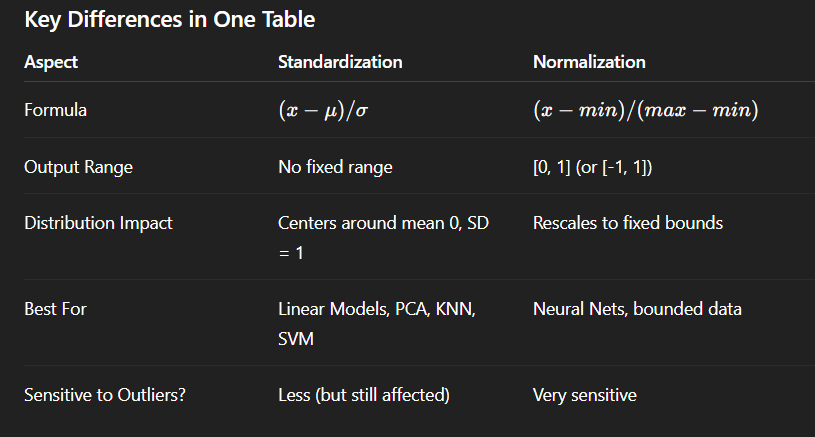

<h3> Models 

<h5> 1) Leniar Regression

a) it is used to find the relationship between a dependent variable and target and one or more independent variable which is features.

b) the idea in this is to fit a straight a straight line that represent the data best( the best fit line)

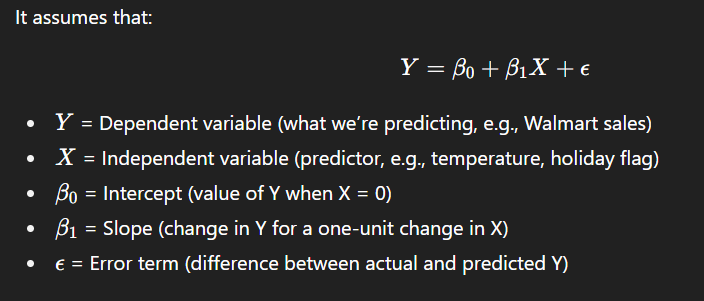

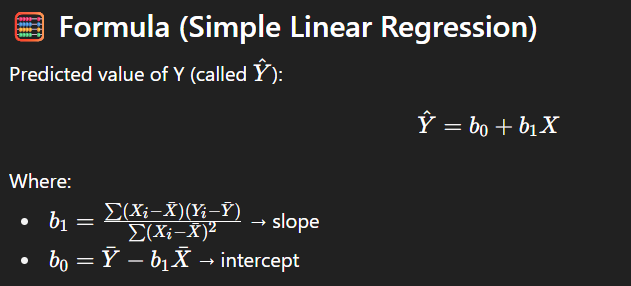

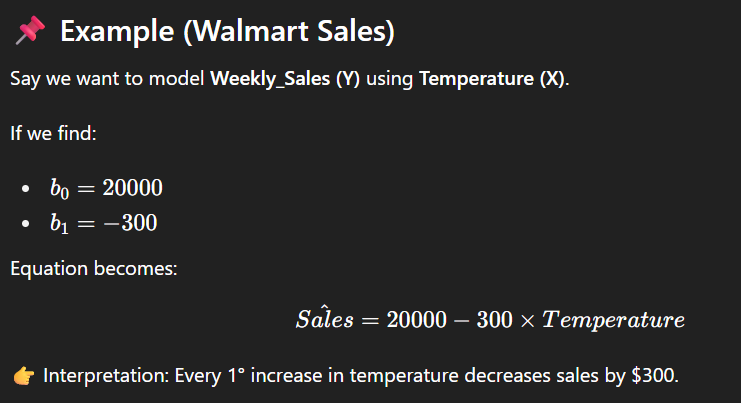

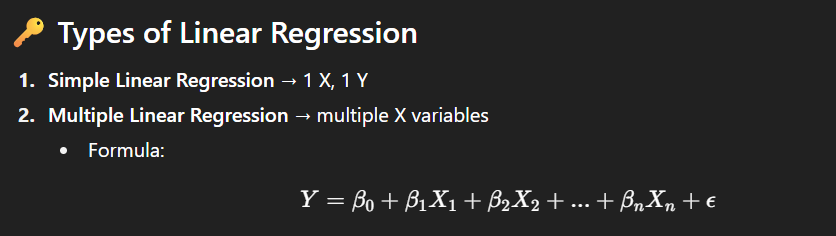

The best fit line is chosen so that the sum of squared errors (SSE) between actual and predicted values is minimized.

That’s why the method is called Ordinary Least Squares (OLS).

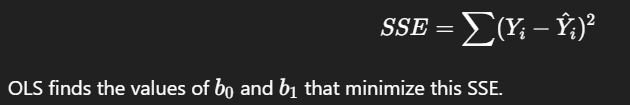

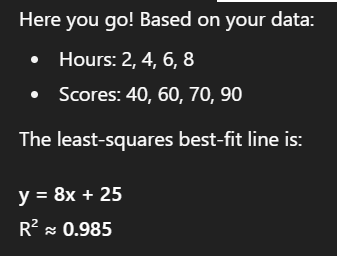

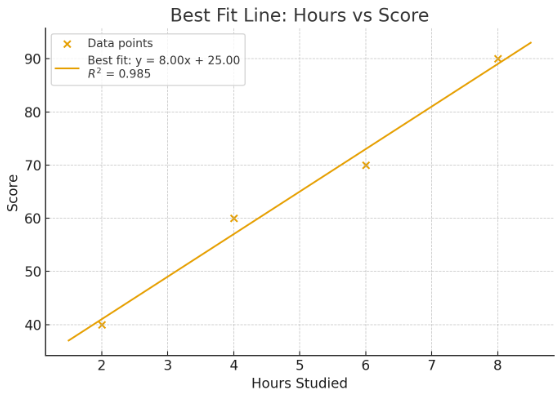

<h5>2) Logistic Regression

Despite the name, it’s actually a classification algorithm, not a regression one.

It’s used when the target variable is categorical (like yes/no, spam/not spam, disease/no disease).

Instead of predicting a straight line, it predicts a probability that something belongs to a class.

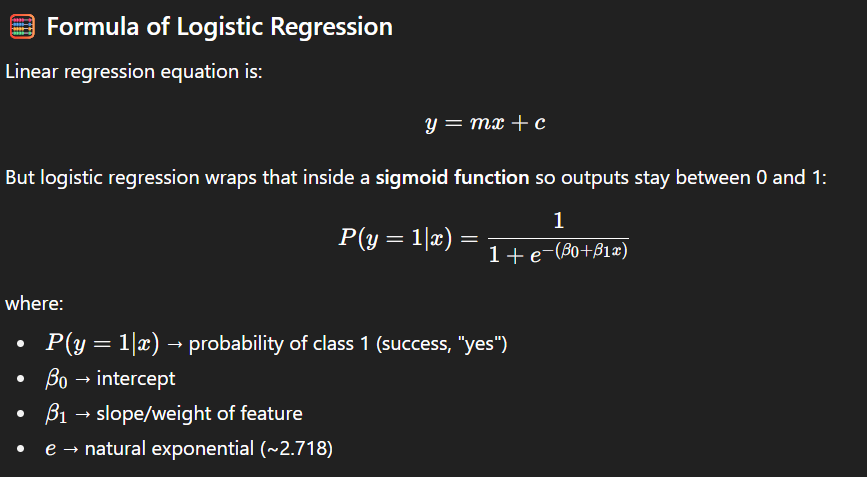





it is simply trying to convert the independent variable into an expression of probability with respect to dependent variabe that ranges between 0 to 1

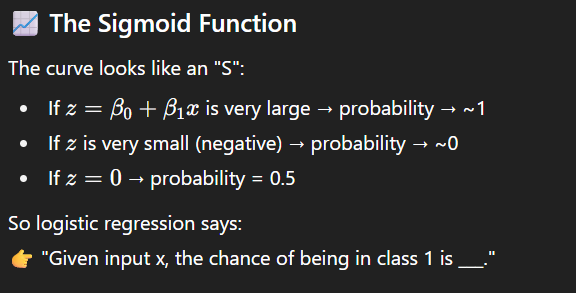

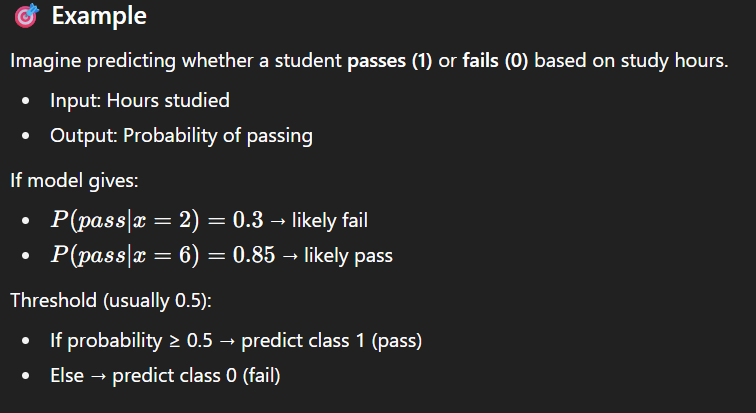

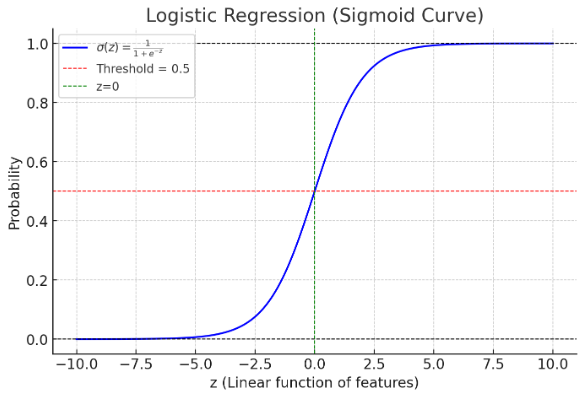

Here’s the logistic regression sigmoid curve 📈:

The curve always stays between 0 and 1, representing probabilities.

At z = 0, probability = 0.5 (the decision boundary if threshold = 0.5).

As z → ∞, probability → 1.

As z → –∞, probability → 0.

This is how logistic regression maps a linear function (z = mx + c) into a probability of belonging to a class.

<h5>3) KNN Classification

KNN is a supervised learning algorithm used for classification (and regression).
It works on a very simple principle:

👉 “A data point is classified based on the majority class of its k nearest neighbors.”

Think of it like asking your closest friends what they think, and going with the majority opinion.

Example::

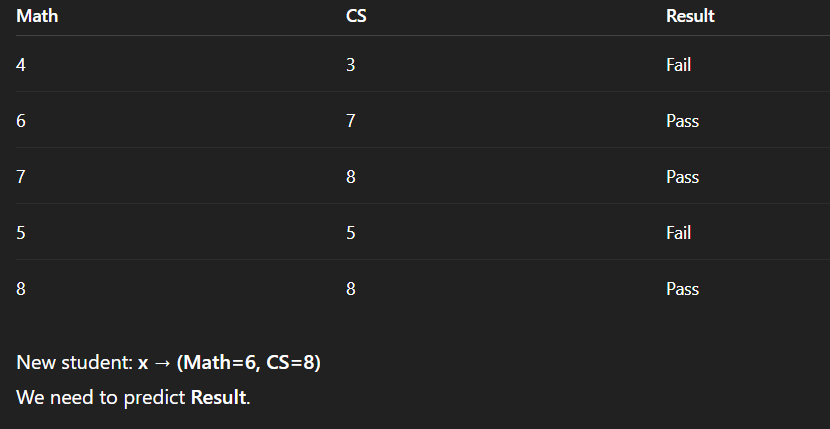

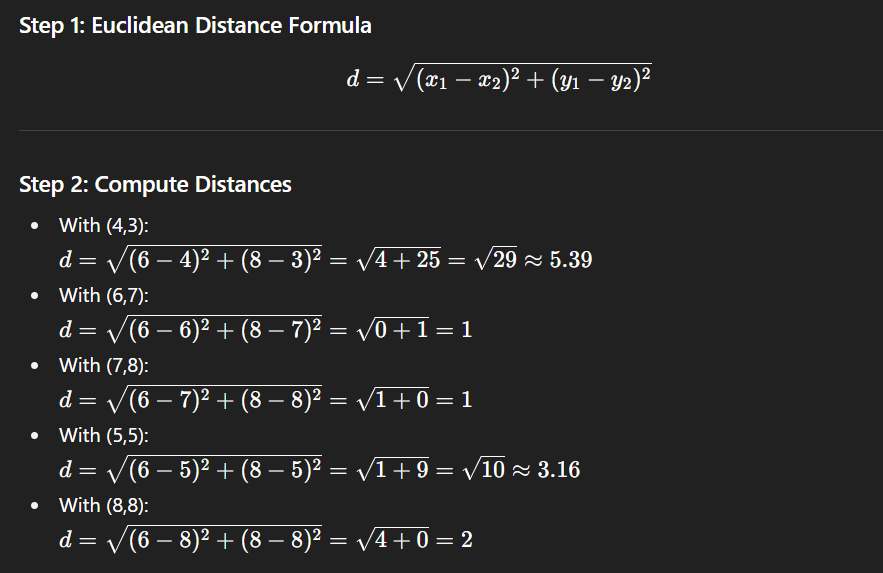

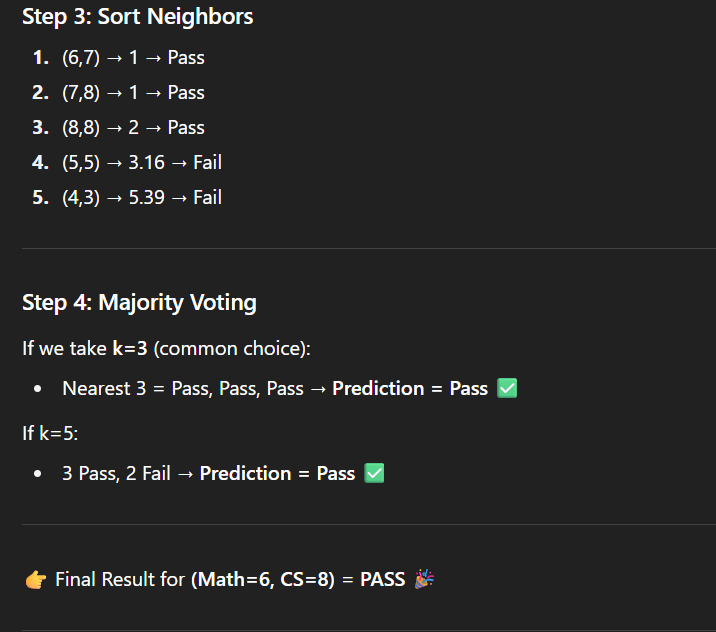

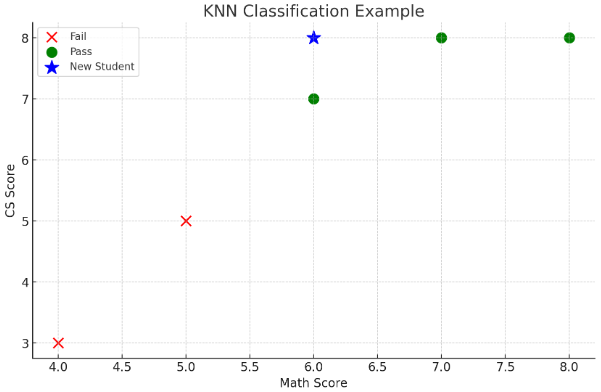

Here’s the KNN classification graph:

🟥 Red X = Fail students

🟩 Green O = Pass students

🔵 Blue ★ = New student (Math=6, CS=8)

By checking its nearest neighbors, the new student clearly lies closer to the Pass cluster → ✅ Predicted Result = Pass.

<h5> 4) Decision Tree

A decision tree is like a flowchart:

At each node, we ask a yes/no question (a split).

Example: "Is Math > 5.5?"

Based on the answer, we move left (No) or right (Yes).

At the leaf node → we assign a class (Pass/Fail).

So, it’s just a sequence of decisions.

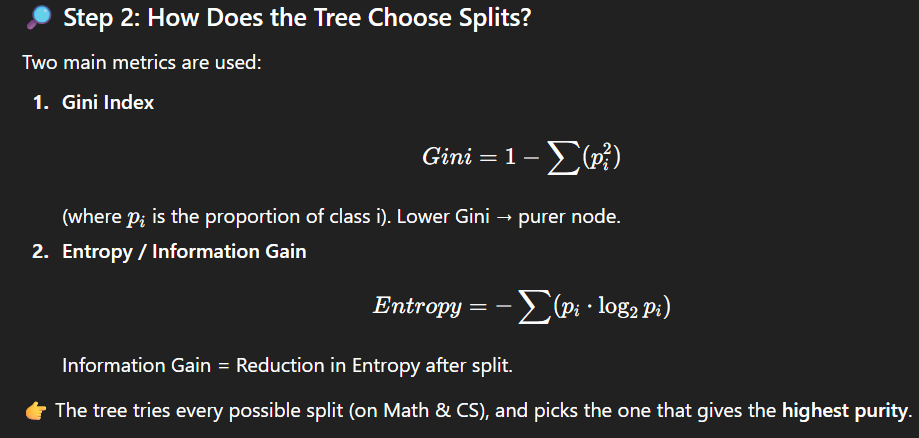

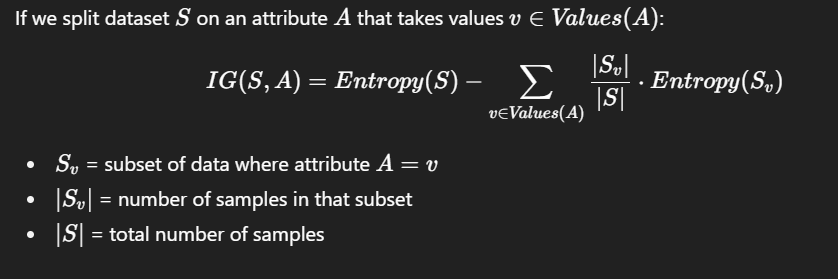

Gain= IG- E(A)

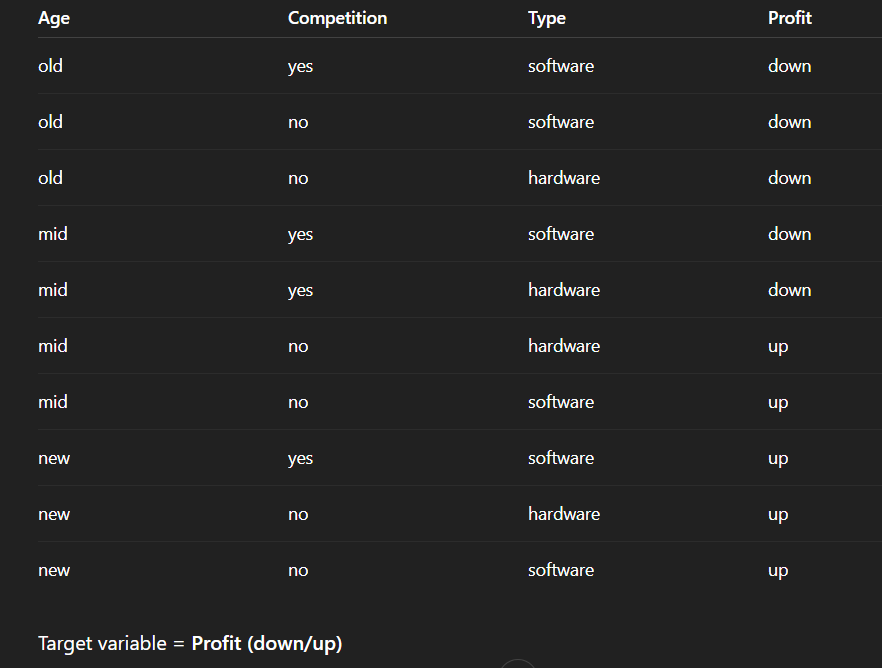

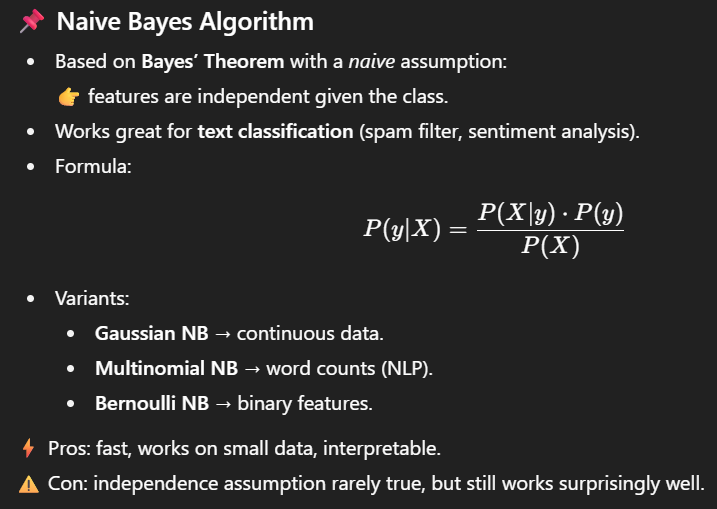

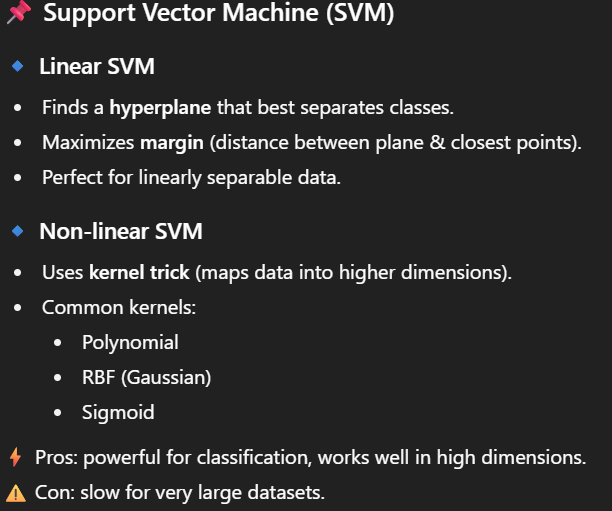

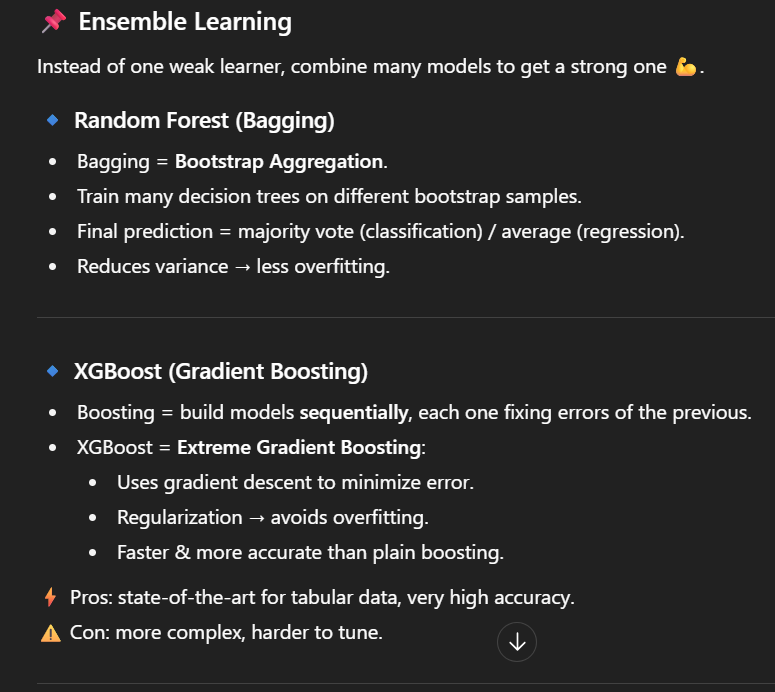

Naive Bayes: simple probabilistic classifier.

SVM: finds a perfect separator line/curve.

Random Forest (Bagging): many independent trees → stable.

XGBoost (Boosting): trees correct each other sequentially → sharp accuracy.

<h5> Metrices: 


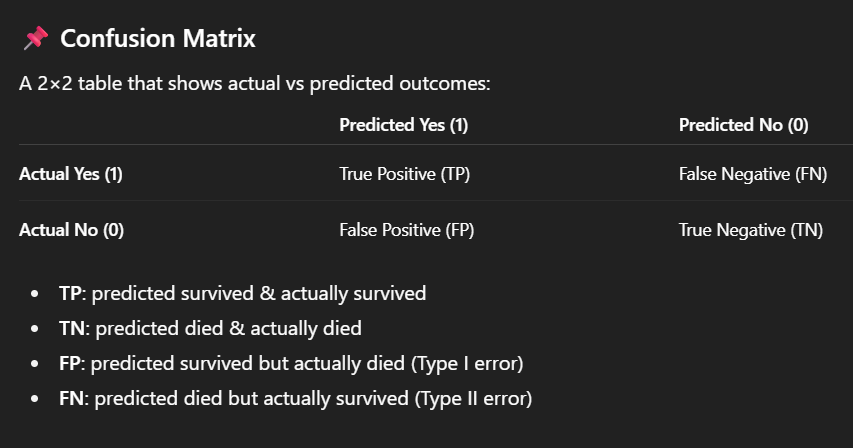

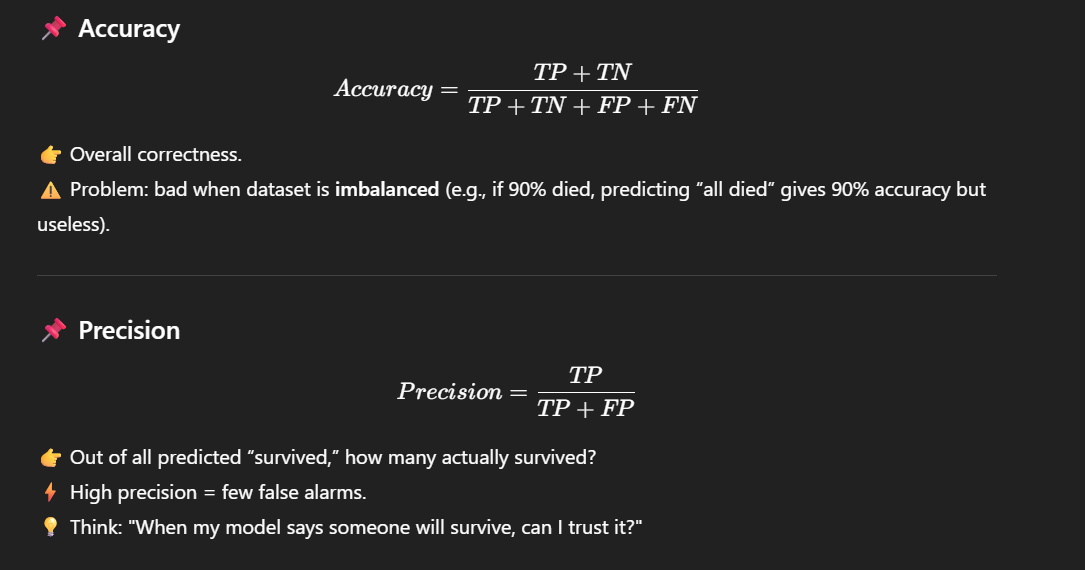

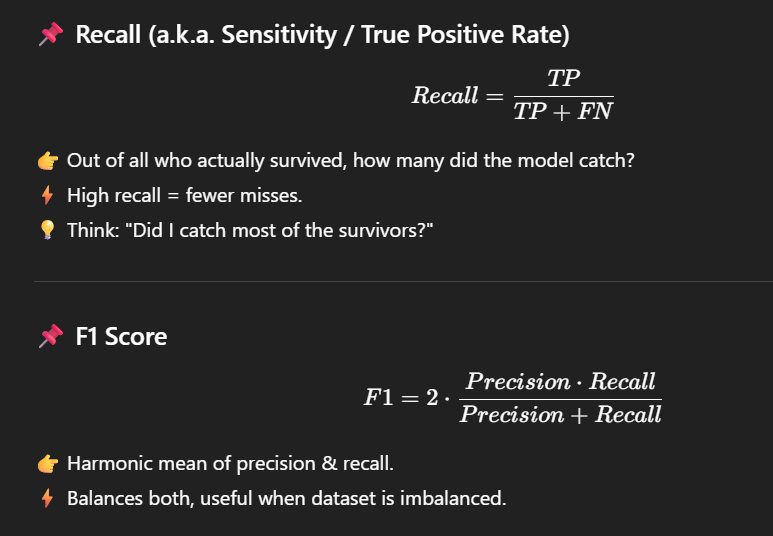

<h5>R - Squared

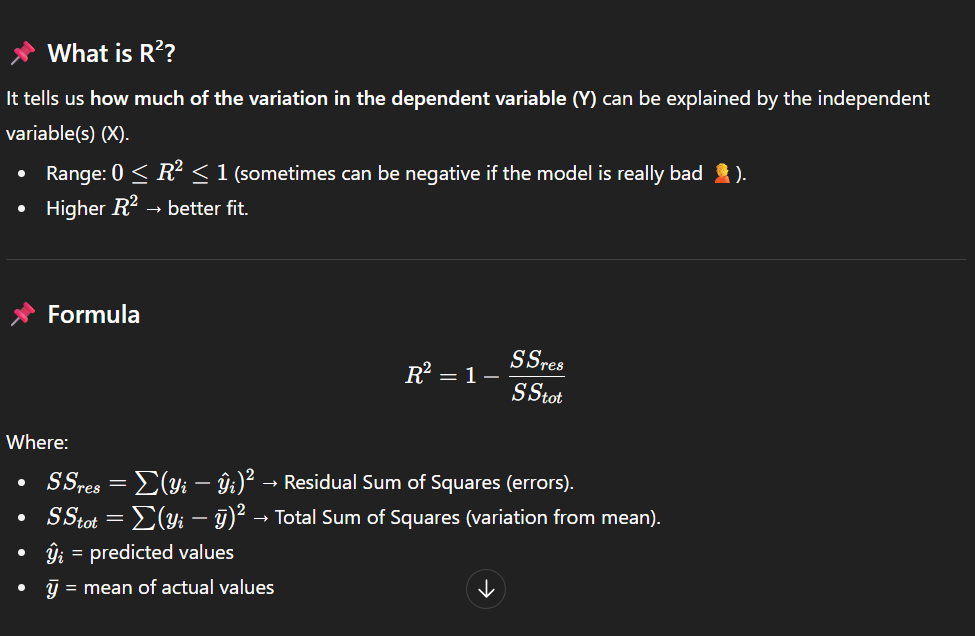

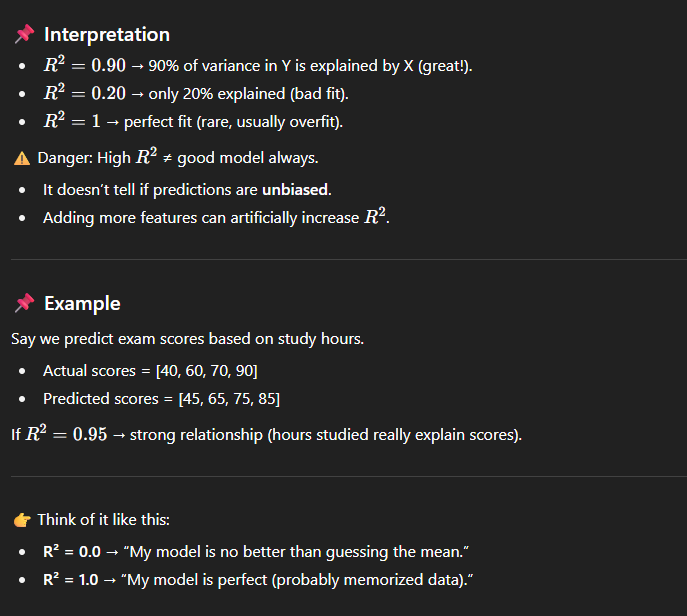

<h5> Adjusted R-squared

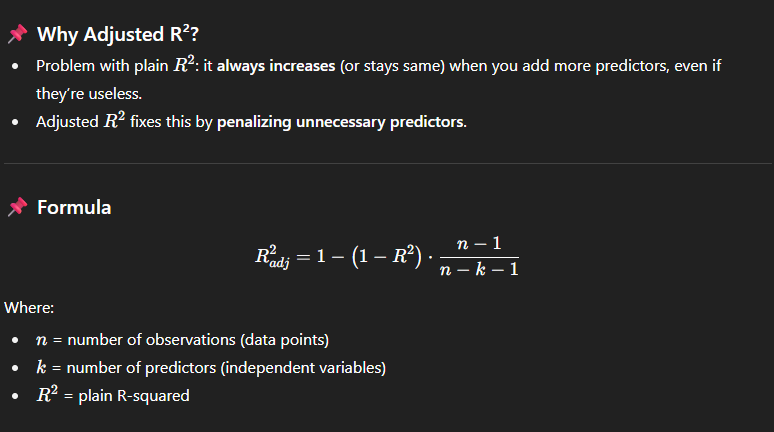

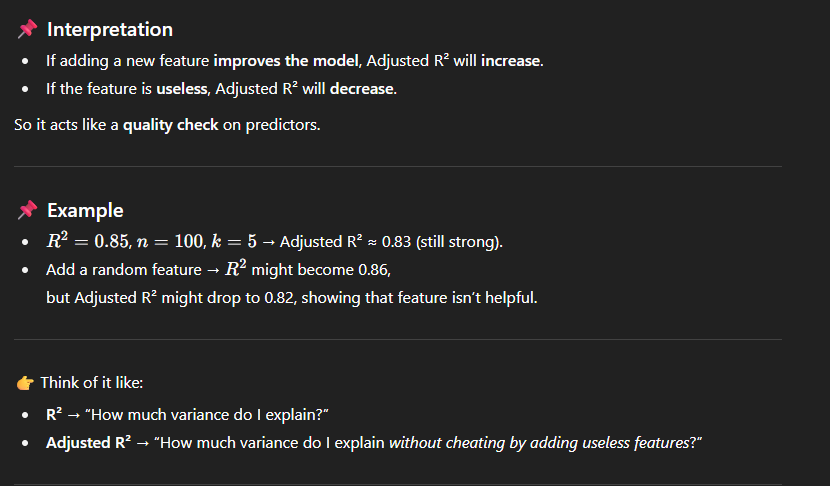

<h5> MAE: mean absolute error

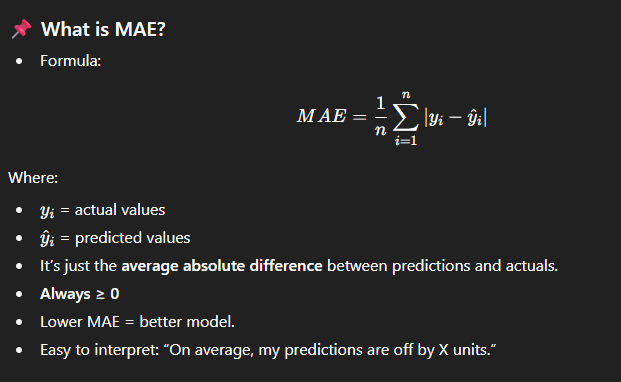

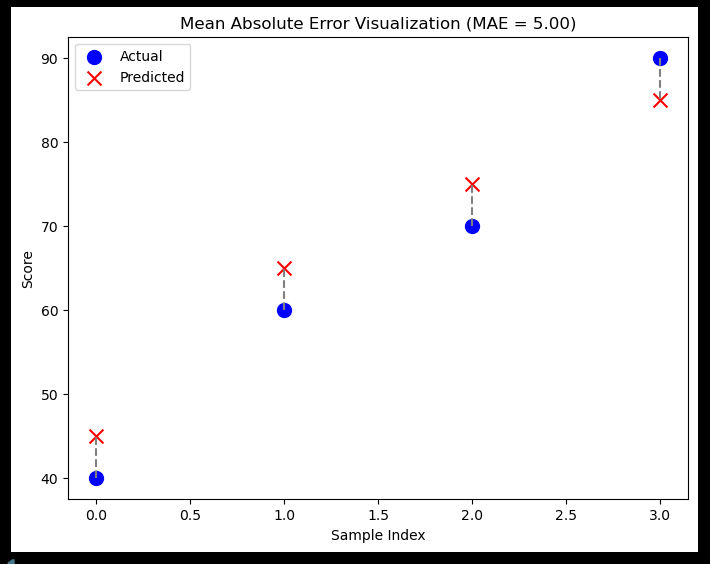

<h1>10 Sept 2025

<h2><center>Splitting the Dataset and selecting the Models

In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((623, 8), (623,), (268, 8), (268,))